# CoolBox Demostration

In [3]:
%matplotlib inline

import sys
sys.path.append("../")
from coolbox.api import *

## A simple introduce to Jupyter notebook

The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

In [9]:
# for example you can write Python code here
def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n - 1) + fib(n - 2)

In [10]:
fib(10)

55

In [11]:
[fib(i) for i in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [14]:
%%bash
# and you can also run bash code here

fortune | cowsay

 _________________________________________
/ Gratitude and treachery are merely the  \
| two extremities of the same procession. |
| You have seen all of it that is worth   |
| staying for when the band and the gaudy |
| officials have gone by.                 |
|                                         |
| -- Mark Twain, "Pudd'nhead Wilson's     |
\ Calendar"                               /
 -----------------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||


###  And write the document here like this:

### Fibonacci numbers

In mathematics, the Fibonacci numbers are the numbers in the following integer sequence, called the Fibonacci sequence, and characterized by the fact that every number after the first two is the sum of the two preceding ones. [link to wiki](https://en.wikipedia.org/wiki/Fibonacci_number)

$F_0 = 0$,

$F_1 = 1$,

$F_n = F_n-1 + F_(n-2)$

![](https://upload.wikimedia.org/wikipedia/commons/2/2e/FibonacciSpiral.svg)

# CoolBox
# Basic Tracks:

In [2]:
!ls test_data/

bedgraph_chrx_2e6_5e6.bg   hg19 .bed.gz
bigwig_chrx_2e6_5e6.bw	   Input.unique.bw
chromatinStates_kc.bed.gz  merged_loops.loops
dm3_genes.bed6.gz	   Rao2014-GM12878-MboI-allreps-filtered.50kb.cool
dm3_genes.bed.gz	   tad_classification.bed
H3K27ac.bw		   tad_score.gz
H3K9me3.bw		   test.arcs


### XAxis

In [15]:
# This is a XAxis
XAxis()

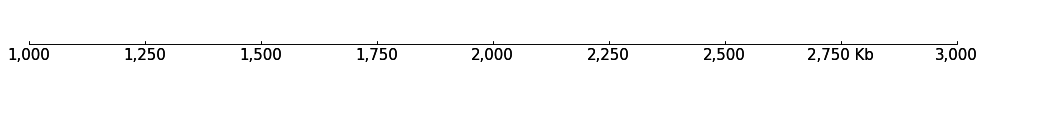

In [8]:
# plot it
( XAxis() + Spacer() ).plot("chr1", 1000000, 3000000)

### BigWig and BedGraph

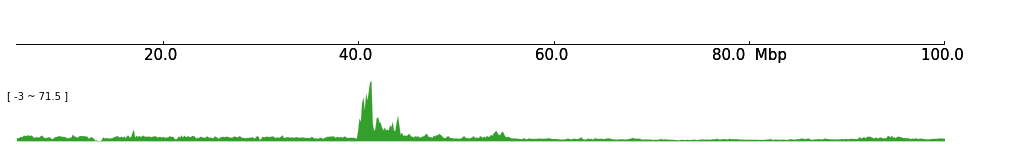

In [17]:
# BigWig Track
( XAxis() + BigWig("./test_data/Input.unique.bw") ).plot("chr1", 5_000_000, 100_000_000)

#### Track + Feature = Track (with Feature)

for example:

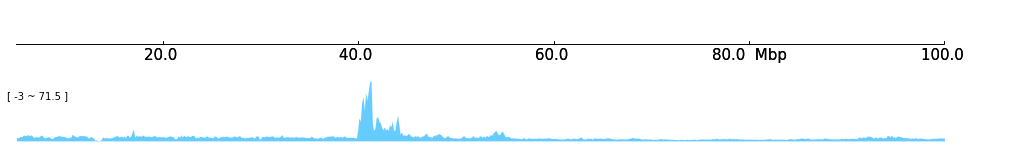

In [20]:
( XAxis() + BigWig("./test_data/Input.unique.bw") + Color("#66ccff") ).plot("chr1", 5_000_000, 100_000_000)

#### BedGraph

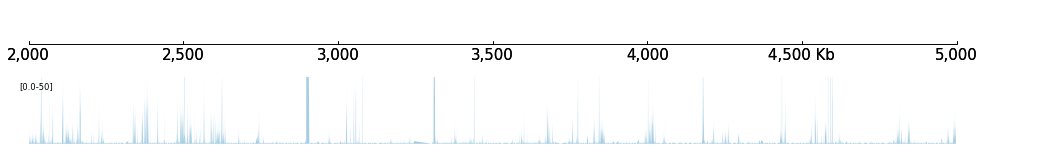

In [22]:
( XAxis() + BedGraph("./test_data/bedgraph_chrx_2e6_5e6.bg") + MaxValue(50) ).plot("chrX", 2_000_000, 5_000_000)

### Bed, TAD and Arc

#### Bed

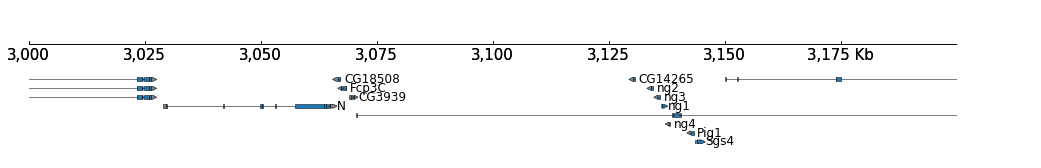

In [23]:
( XAxis() + Bed("./test_data/dm3_genes.bed.gz") ).plot("chrX", 3_000_000, 3_200_000 )

#### TADs

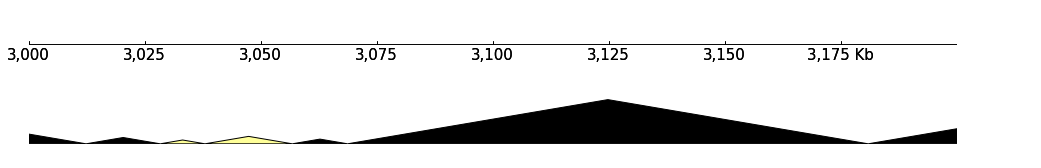

In [26]:
( XAxis() + TADs("./test_data/tad_classification.bed") ).plot("chrX", 3_000_000, 3_200_000 )

#### Arcs

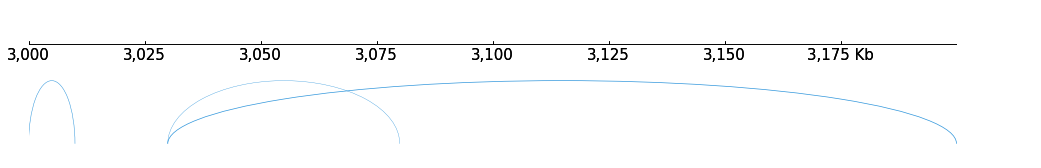

In [28]:
( XAxis() + Arcs("./test_data/test.arcs") ).plot("chrX", 3_000_000, 3_200_000 )

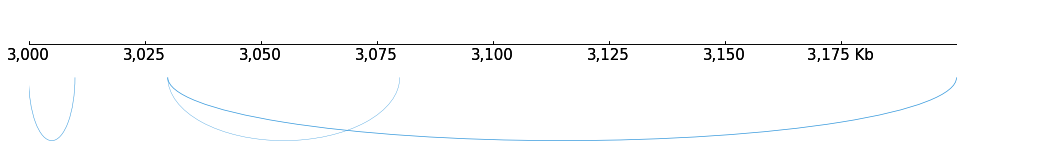

In [29]:
( XAxis() + Arcs("./test_data/test.arcs") + Inverted() ).plot("chrX", 3_000_000, 3_200_000 )

## HiC Tracks

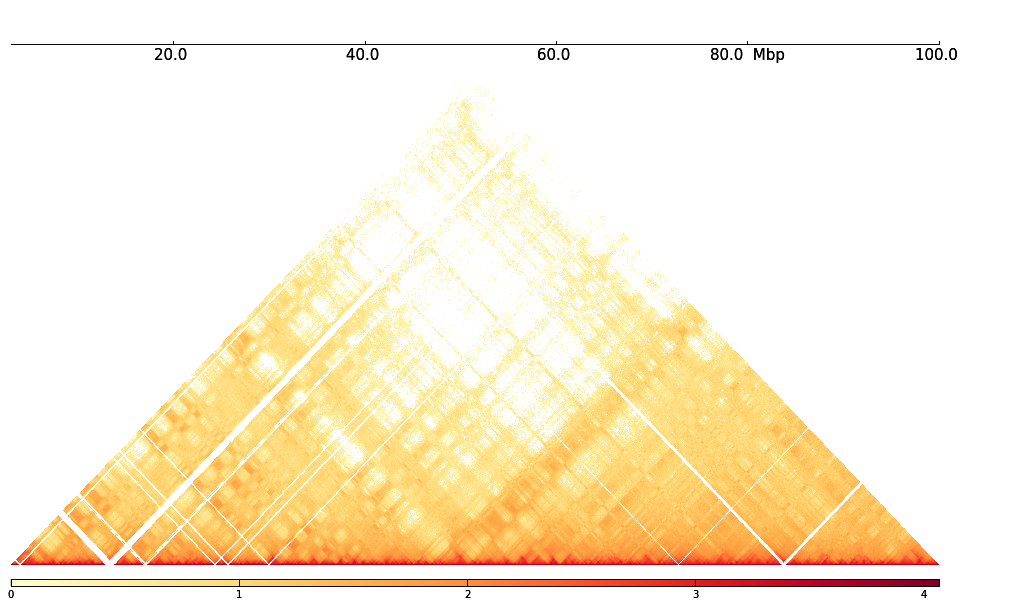

In [36]:
( XAxis() + Cool("./test_data/Rao2014-GM12878-MboI-allreps-filtered.50kb.cool") ).plot("chr1", 3_000_000, 100_000_000)

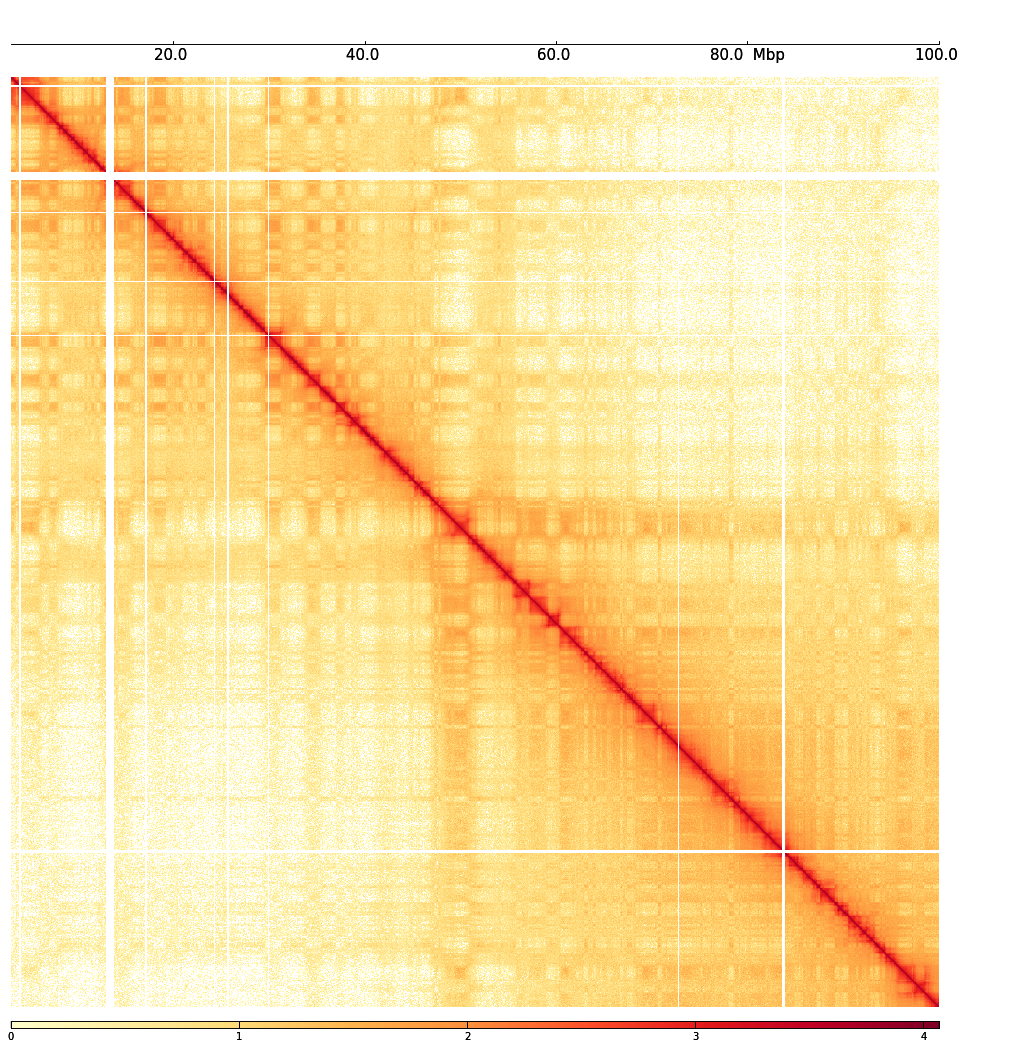

In [37]:
( 
    XAxis() + Cool("./test_data/Rao2014-GM12878-MboI-allreps-filtered.50kb.cool") + Feature("triangular", "no") 
).plot("chr1", 3_000_000, 100_000_000)

# Elements Composition
### Track + Track = Frame

In [34]:
frame = XAxis() + \
        Spacer(height=2) + \
        Bed('./test_data/dm3_genes.bed.gz') + Title("genes") + \
        BigWig("./test_data/bigwig_chrx_2e6_5e6.bw") + Title("bigwig") + Color("#ff9c9c") + \
        Arcs("./test_data/test.arcs") + Title("arcs") + Inverted() + \
        BedGraph("./test_data/bedgraph_chrx_2e6_5e6.bg") + Title("bedgraph") + MaxValue(100) + \
        TADs("./test_data/tad_classification.bed") + Title("TADs") +\
        XAxis() +\
        FrameTitle("Test Frame")

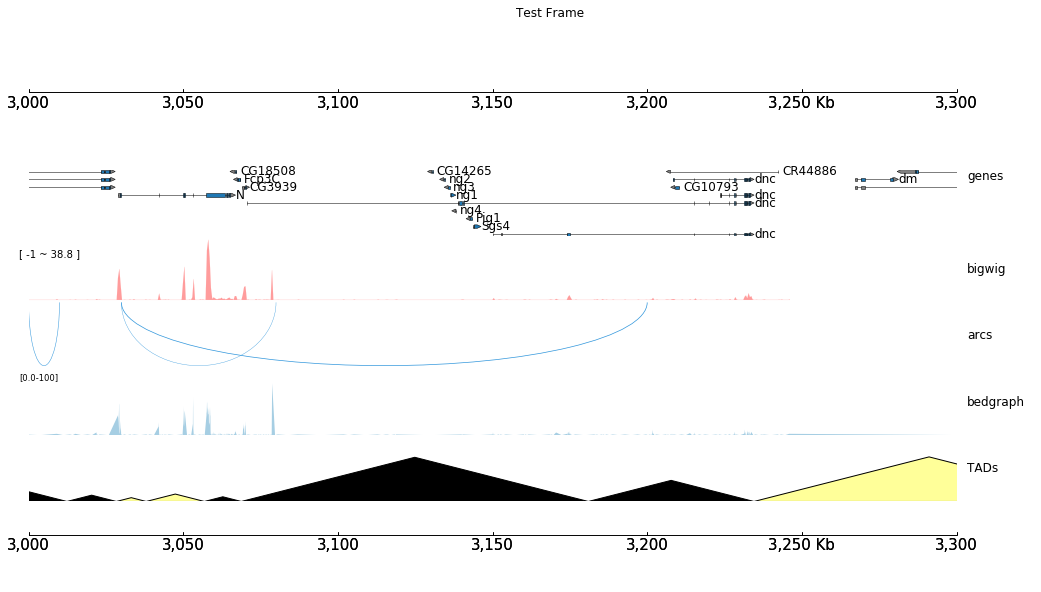

In [35]:
frame.plot("chrX", 3_000_000, 3_300_000)

In [47]:
frame = XAxis() + \
        Cool("./test_data/Rao2014-GM12878-MboI-allreps-filtered.50kb.cool") +\
            Title("MboI_50kb") + Loops("./test_data/merged_loops.loops") + \
        BigWig("./test_data/H3K27ac.bw") + Title("H3K27ac") + \
        Arcs("./test_data/merged_loops.arcs", orientation="inverted") + Title("Loops") + \
        BigWig("./test_data/H3K9me3.bw") + Title("H3K27me3") + \
        BigWig("./test_data/Input.unique.bw") + Title("Input") + Color("#ff9c9c")

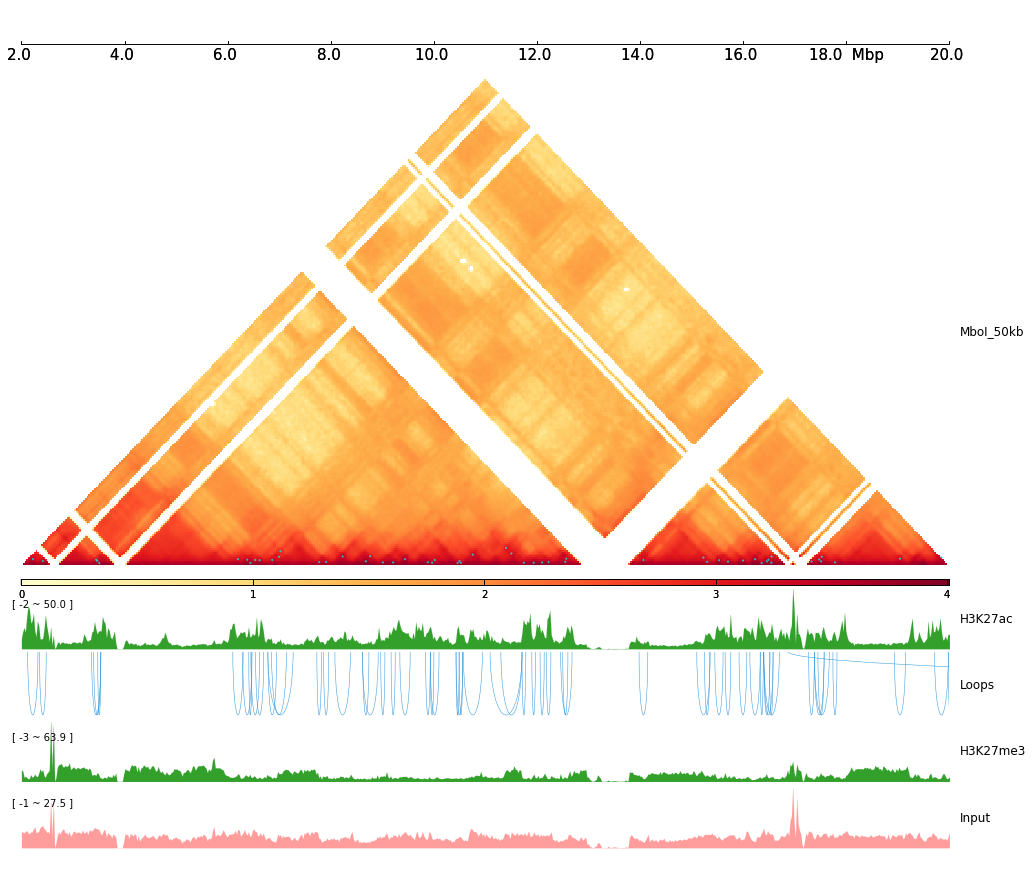

In [50]:
frame.plot("chr1", 2_000_000, 20_000_000)

# Coverage

### Frame * Coverage = Frame ( All Tracks with Coverage)

In [51]:
frame = frame * HighLights([(85_400_000, 85_800_000, '#ff9c9c')])
frame = frame * HighLights([(87_200_000, 87_600_000, '#ff9c9c')])

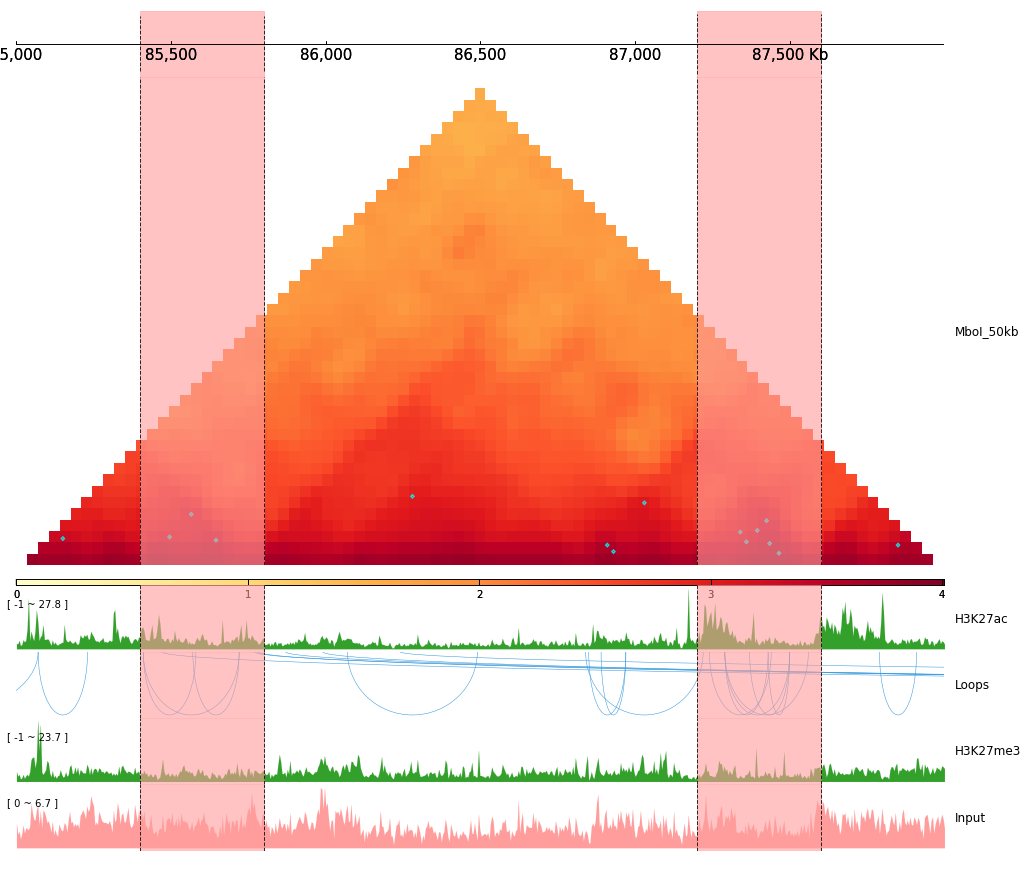

In [52]:
frame.plot("chr1", 85_000_000, 88_000_000)

## Peak Coverage

In [53]:
frame = XAxis() + \
        Cool("./test_data/Rao2014-GM12878-MboI-allreps-filtered.50kb.cool") +\
            Title("MboI_50kb") + Loops("./test_data/merged_loops.loops") + \
        BigWig("./test_data/H3K27ac.bw") + Title("H3K27ac") + \
        Arcs("./test_data/merged_loops.arcs", orientation="inverted") + Title("Loops") + \
        BigWig("./test_data/H3K9me3.bw") + Title("H3K27me3") + \
        BigWig("./test_data/Input.unique.bw") + Title("Input") + Color("#ff9c9c")

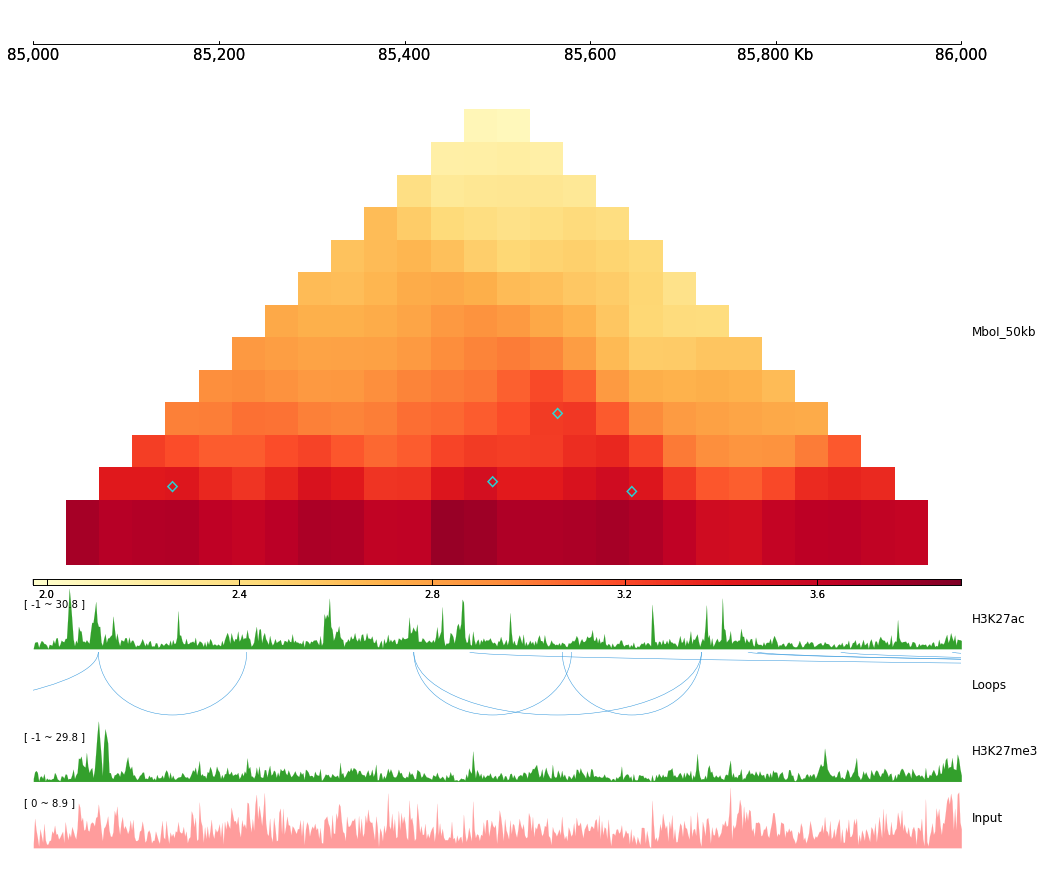

In [54]:
frame.plot("chr1", 85_000_000, 86_000_000)

# Browser

In [55]:
frame = XAxis() + \
        Cool("./test_data/Rao2014-GM12878-MboI-allreps-filtered.50kb.cool") +\
            Title("MboI_50kb") + Loops("./test_data/merged_loops.loops") + \
        BigWig("./test_data/H3K27ac.bw") + Title("H3K27ac") + \
        Arcs("./test_data/merged_loops.arcs", orientation="inverted") + Title("Loops") + \
        BigWig("./test_data/H3K9me3.bw") + Title("H3K27me3") + \
        BigWig("./test_data/Input.unique.bw") + Title("Input") + Color("#ff9c9c")
        
bsr = Browser(frame)

In [56]:
bsr.show()

VBox(children=(VBox(children=(HBox(children=(Dropdown(options=('chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY'), value='chr1'), Button(icon='arrow-left', style=ButtonStyle()), Button(icon='arrow-right', style=ButtonStyle()), Button(icon='search-minus', style=ButtonStyle()), Button(icon='search-plus', style=ButtonStyle()), Text(value='chr1:1-10000000', placeholder="genome range like: 'chr1:10000-20000'"), Button(description='Go', style=ButtonStyle()))), HBox(children=(Label(value='1', layout=Layout(width='2%')), IntRangeSlider(value=(1, 10000000), continuous_update=False, layout=Layout(width='90%'), max=249250621, min=1, readout=False), Label(value='249250621', layout=Layout(width='20%')))), HBox(children=(Checkbox(value=True, description='Auto Range', layout=Layout(width='120px'), style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=0.0, description="track's min value:", disabled=True, layout=Layout(width='30%'), step=0.5, style=DescriptionStyle(description_width='initial')), BoundedFloatText(value=10.0, description="track's max value:", disabled=True, layout=Layout(width='30%'), step=0.5, style=DescriptionStyle(description_width='initial'))), layout=Layout(justify_content='flex-start'))), layout=Layout(border='solid 2px')), Image(value=b'')))